In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3] 

In [4]:
# Leer FrutasTrain.csv
datos = pd.read_csv(DATOS_DIR + "FrutasTrain.csv")
nColum = list(datos.columns.values)

#--- DATOS DE ENTRENAMIENTO ---
xTrain = np.array(datos.iloc[:,0:2])
T_Train = datos['Clase'] == 'Melon'  #es boolean
T_Train = np.array(T_Train * 1)  #lo convierte en binario

#--- DATOS DE TESTEO ---
datosTest = pd.read_csv(DATOS_DIR + "FrutasTest.csv")
xTest = np.array(datosTest.iloc[:,0:2])
T_Test = np.array((datosTest['Clase'] == 'Melon') * 1) 

normalizar = 1
if (normalizar):
    #--- Normalización lineal entre 0 y 1 ---
    #normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    normalizador= preprocessing.StandardScaler()
    
    xTrain = normalizador.fit_transform(xTrain)
    xTest = normalizador.transform(xTest)

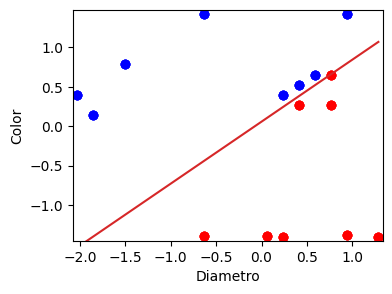

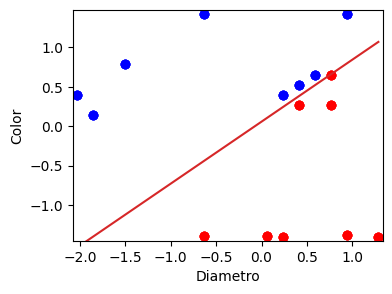

In [16]:
ppn = Perceptron(alpha=0.05, n_iter=350, draw=1, title=nColum[0:2], random_state=None)
ppn.fit(xTrain, T_Train)

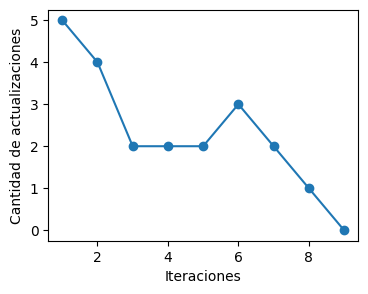

In [6]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

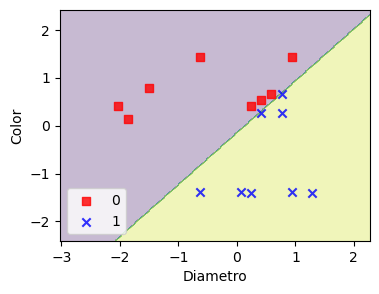

In [6]:
from PlotRegiones import plot_decision_regions

plot_decision_regions(xTrain, T_Train, classifier=ppn)
plt.xlabel(ppn.title[0])
plt.ylabel(ppn.title[1])
plt.legend(loc='lower left')
plt.show()

In [7]:
Y_Test = ppn.predict(xTest)
print("Y = ", Y_Test)
print("T = ", T_Test)
aciertos = sum(Y_Test == T_Test)
print("aciertos = ", aciertos)
nAciertos = sum(Y_Test == T_Test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/xTest.shape[0]))


Y =  [0 1 1 0]
T =  [0 1 1 0]
aciertos =  4
% de aciertos = 100.00 %
